In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import re

In [2]:
dataurl = "https://raw.githubusercontent.com/kglan/MSDS/main/DATA608/Story4/Data_related_jobs_glassdoor.csv"
dataraw = pd.read_csv(dataurl, encoding='latin1')
dataraw.head(10)


,company,job title,location,job description,salary estimate,company_size,company_type,company_sector,company_industry,company_founded,...,python_yn,spark_yn,azure_yn,aws_yn,excel_yn,machine_learning_yn,job_simpl,seniority,description_len,company_age
0,Microsoft,Data & Applied Scientist,"Redmond, WA",Microsoft 365 is a key part of the companys c...,123486,10000+ Employees,Company - Public,Information Technology,Computer Hardware Development,1975.0,...,1,0,0,1,0,1,data scientist,junior,359,47.0
1,UT Southwestern Medical Center,Data Scientist or Bioinformatician (remote),Remote,Center Information:\nThe Quantitative Biomedic...,93500,10000+ Employees,Hospital,Healthcare,Health Care Services & Hospitals,1943.0,...,1,0,0,0,0,1,data scientist,mid,267,79.0
2,Notion,"Data Scientist, Growth","New York, NY",About Us:\nWe're on a mission to make it possi...,137853,201 to 500 Employees,Company - Private,Information Technology,Enterprise Software & Network Solutions,2016.0,...,1,0,0,0,0,0,data scientist,Senior,589,6.0
3,Net2Aspire,Jr. Data Scientist,Remote,? Apply Statistical and Machine Learning metho...,72500,Unknown,Company - Public,NaN,NaN,NaN,...,0,0,0,0,0,1,data scientist,junior,132,NaN
4,Ntropy Network,Data Scientist,Remote,"Over the last few decades, technological innov...",155000,1 to 50 Employees,Company - Private,NaN,NaN,NaN,...,1,0,0,1,0,0,data scientist,mid,522,NaN
5,PayPal,Data Scientist,"Chicago, IL","At PayPal (NASDAQ: PYPL), we believe that ever...",109837,10000+ Employees,Company - Public,Information Technology,Internet & Web Services,1998.0,...,1,0,0,0,0,1,data scientist,Senior,618,24.0
6,"Pomeroy Technologies, LLC.",Data Scientist,Remote,Data Scientist--Remote\n(company is based in t...,110000,1001 to 5000 Employees,Subsidiary or Business Segment,Information Technology,Information Technology Support Services,1982.0,...,0,0,0,0,0,0,data scientist,mid,140,40.0
7,Delta,"Associate Data Scientist, Operations Decision ...","Atlanta, GA","United States, Georgia, Atlanta\nOps Control\n...",103268,10000+ Employees,Company - Public,Transportation & Logistics,"Airlines, Airports & Air Transportation",1928.0,...,1,0,0,0,0,1,data scientist,junior,249,94.0
8,Booz Allen Hamilton,"Tech Excellence Data Scientist, Junior","Alexandria, VA",The Challenge:\nAre you excited at the prospec...,102817,10000+ Employees,Company - Public,Management & Consulting,Business Consulting,1914.0,...,1,0,0,0,1,1,data scientist,junior,570,108.0
9,Starz,Data Scientist,"New York, NY",Department: Business Development\nLocation: Ne...,105016,501 to 1000 Employees,Subsidiary or Business Segment,Media & Communication,Broadcast Media,1994.0,...,1,0,0,1,0,1,data scientist,Senior,616,28.0


In [3]:
dataraw = dataraw[['company', 'job title', 'location', 'salary estimate', 'job_simpl', 'seniority']]
dataraw.head()

,company,job title,location,salary estimate,job_simpl,seniority
0,Microsoft,Data & Applied Scientist,"Redmond, WA",123486,data scientist,junior
1,UT Southwestern Medical Center,Data Scientist or Bioinformatician (remote),Remote,93500,data scientist,mid
2,Notion,"Data Scientist, Growth","New York, NY",137853,data scientist,Senior
3,Net2Aspire,Jr. Data Scientist,Remote,72500,data scientist,junior
4,Ntropy Network,Data Scientist,Remote,155000,data scientist,mid


In [4]:
unique_locations = dataraw['location'].unique()
print(unique_locations)

['Redmond, WA' 'Remote' 'New York, NY' 'Chicago, IL' 'Atlanta, GA'
 'Alexandria, VA' 'Vienna, NY' 'Brooklyn, NY' 'Thousand Oaks, CA'
 'Marysville, MI' 'Marlborough, MA' 'Seattle, WA' 'Pittsburgh, PA'
 'Mountain View, CA' 'Brookfield, WI' 'Kingston, RI' 'Boston, MA'
 'Austin, TX' 'Chesterfield, MO' 'Battle Creek, MI' 'Bothell, WA'
 'Washington, DC' 'Bellevue, WA' 'San Jose, CA' 'Baton Rouge, LA'
 'Hershey, PA' 'Glen Echo, MD' 'Morrisville, NC' 'Wallops Island, VA'
 'Raritan, NJ' 'Santa Monica, CA' 'Los Gatos, CA' 'Edison, NJ'
 'Jacksonville, FL' 'Des Moines, IA' 'Dearborn, MI' 'Arlington, VA'
 'San Diego, CA' 'Iselin, NJ' 'Denver, CO' 'San Francisco, CA'
 'Monroe, LA' 'Lexington, MA' 'Plano, TX' 'Palo Alto, CA' 'Tampa, FL'
 'Moriarty, NM' 'Santa Clara, CA' 'Arden Hills, MN' 'Reston, VA'
 'Camp Lejeune, NC' 'Atlanta, IN' 'Houston, TX' 'Pomona, CA'
 'Pasadena, CA' 'Woodbridge, NJ' 'Burlingame, CA' 'Emeryville, CA'
 'Indianapolis, IN' 'Franklin Lakes, NJ' 'Chantilly, VA' 'Los Angeles, CA'


In [5]:
# Define a function to extract state codes from location
def extract_state(location):
    if location == 'Remote':
        return 'Remote'
    elif re.search(r', [A-Z]{2}$', location):
        # Extract two-letter state code if available
        return re.search(r', ([A-Z]{2})$', location).group(1)
    else:
        # Handle cases without 'City, State' format
        return location

# Apply the function to the 'location' column
dataraw['location'] = dataraw['location'].apply(extract_state)

In [6]:
unique_locations = dataraw['location'].unique()
print(unique_locations)

['WA' 'Remote' 'NY' 'IL' 'GA' 'VA' 'CA' 'MI' 'MA' 'PA' 'WI' 'RI' 'TX' 'MO'
 'DC' 'LA' 'MD' 'NC' 'NJ' 'FL' 'IA' 'CO' 'NM' 'MN' 'IN' 'OH'
 'South Carolina' 'Manhattan' 'North Carolina' 'UT' 'ID' 'CT' 'OK' 'DE'
 'AR' 'NV' 'Massachusetts' 'NE' 'Township of Lawrence' 'United States'
 'Texas' 'TN' 'AZ' 'Long Island-Queens' 'OR' 'Texhoma' 'Illinois'
 'Wisconsin' 'Arizona' 'California' 'SC' 'New York State' 'KS' 'AL' 'MS'
 'PR' 'Connecticut']


In [7]:
# Create a mapping dictionary
state_mapping = {
    'South Carolina': 'SC',
    'Manhattan': 'NY',
    'United States': 'Remote',
    'North Carolina': 'NC',
    'Massachusetts': 'MA',
    'Township of Lawrence': 'NJ',
    'Texas': 'TX',
    'Long Island-Queens': 'NY',
    'Texhoma': 'OK',
    'Illinois': 'IL',
    'Wisconsin': 'WI',
    'Arizona': 'AZ',
    'California': 'CA',
    'New York State': 'NY',
    'Connecticut': 'CT'
}

# Apply the mapping to the 'location' column
dataraw['location'] = dataraw['location'].replace(state_mapping)

In [8]:
unique_locations = dataraw['location'].unique()
print(unique_locations)

['WA' 'Remote' 'NY' 'IL' 'GA' 'VA' 'CA' 'MI' 'MA' 'PA' 'WI' 'RI' 'TX' 'MO'
 'DC' 'LA' 'MD' 'NC' 'NJ' 'FL' 'IA' 'CO' 'NM' 'MN' 'IN' 'OH' 'SC' 'UT'
 'ID' 'CT' 'OK' 'DE' 'AR' 'NV' 'NE' 'TN' 'AZ' 'OR' 'KS' 'AL' 'MS' 'PR']


In [9]:
df = dataraw
df.head(10)

,company,job title,location,salary estimate,job_simpl,seniority
0,Microsoft,Data & Applied Scientist,WA,123486,data scientist,junior
1,UT Southwestern Medical Center,Data Scientist or Bioinformatician (remote),Remote,93500,data scientist,mid
2,Notion,"Data Scientist, Growth",NY,137853,data scientist,Senior
3,Net2Aspire,Jr. Data Scientist,Remote,72500,data scientist,junior
4,Ntropy Network,Data Scientist,Remote,155000,data scientist,mid
5,PayPal,Data Scientist,IL,109837,data scientist,Senior
6,"Pomeroy Technologies, LLC.",Data Scientist,Remote,110000,data scientist,mid
7,Delta,"Associate Data Scientist, Operations Decision ...",GA,103268,data scientist,junior
8,Booz Allen Hamilton,"Tech Excellence Data Scientist, Junior",VA,102817,data scientist,junior
9,Starz,Data Scientist,NY,105016,data scientist,Senior


In [10]:
# # Ensure all values in the 'salary estimate' column are strings
# df_analysis['salary estimate'] = df_analysis['salary estimate'].astype(str)

# # Clean salary estimate (convert to numeric, remove unnecessary characters)
# df_analysis['salary estimate'] = df_analysis['salary estimate'].str.replace('[^0-9]', '', regex=True).astype(float)

# # Group by job_simpl and location, calculate average salary
# average_salary = df_analysis.groupby(['job_simpl', 'location'])['salary estimate'].mean().reset_index()



In [11]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Pivot the data for creating a heatmap
# heatmap_data = average_salary.pivot(index='location', columns='job_simpl', values='salary estimate')

# # Create a heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5)
# plt.title('Average Salary by Job Role and Location')
# plt.show()


NameError: name 'average_salary' is not defined

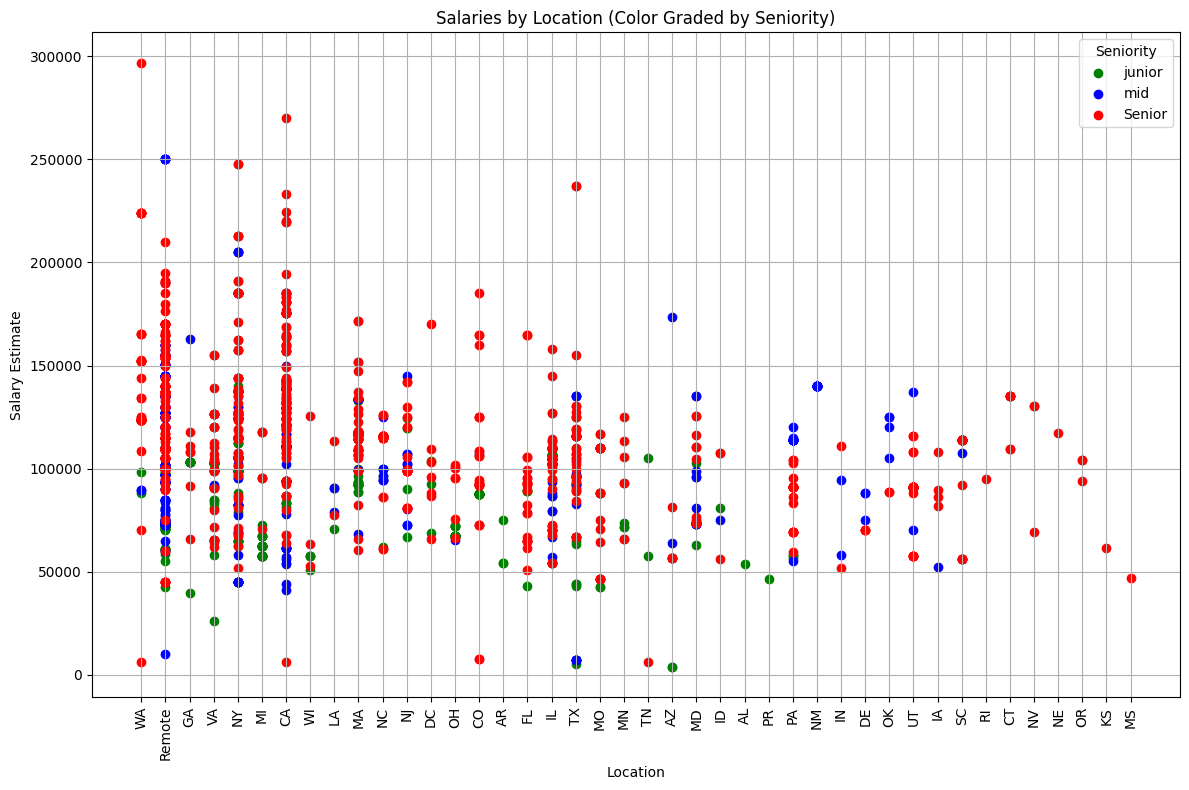

In [12]:
# Define colors for different seniority levels
seniority_colors = {'junior': 'green', 'mid': 'blue', 'Senior': 'red'}

# Create a scatter plot
plt.figure(figsize=(12, 8))
for seniority, color in seniority_colors.items():
    data = df[df['seniority'] == seniority]
    plt.scatter(data['location'], data['salary estimate'], label=seniority, color=color)

# Customize the plot
plt.title('Salaries by Location (Color Graded by Seniority)')
plt.xlabel('Location')
plt.ylabel('Salary Estimate')
plt.legend(title='Seniority')

# Rotate x-axis labels for better readability (adjust as needed)
plt.xticks(rotation=90)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Define a custom palette with colors for each seniority level
seniority_palette = {'Senior': 'red', 'mid': 'blue', 'junior': 'green'}

# Create a scatter plot with Seaborn
plt.figure(figsize=(15, 6))
sns.scatterplot(x='location', y='salary estimate', hue='seniority', data=df, s=100, palette=seniority_palette)

# Label the points with location
for i, row in df.iterrows():
    plt.annotate(row['location'], (i, row['salary estimate']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Salaries by Location (Color Graded by Seniority)')
plt.xlabel('Location')
plt.ylabel('Salary Estimate')
plt.xticks(rotation=90)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the mean salary for each job role
mean_salary_by_job_role = df.groupby('job_simpl')['salary estimate'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='job_simpl', y='salary estimate', data=mean_salary_by_job_role, palette='viridis')

# Customize the plot
plt.title('Average Salary by Job Role (All Seniority Levels)')
plt.xlabel('Job Role')
plt.ylabel('Mean Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the mean salary for each state
mean_salary_by_state = df.groupby('location')['salary estimate'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='salary estimate', data=mean_salary_by_state, palette='viridis')

# Customize the plot
plt.title('Average Salary by State (All Seniority Levels)')
plt.xlabel('State')
plt.ylabel('Mean Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='job_simpl', y='salary estimate', hue='seniority', data=df, ci=None, palette='viridis')

# Customize the plot
plt.title('Salary vs. Job Role (Color-Coded by Seniority)')
plt.xlabel('Job Role')
plt.ylabel('Salary Estimate')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a bar chart
plt.figure(figsize=(16, 6))
sns.barplot(x='location', y='salary estimate', hue='seniority', data=df, ci=None, palette='viridis')

# Customize the plot
plt.title('Salary vs. State (Color-Coded by Seniority)')
plt.xlabel('State')
plt.ylabel('Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average salary for each state
average_salary_by_state = df.groupby('location')['salary estimate'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='salary estimate', data=average_salary_by_state, palette='viridis')

# Customize the plot
plt.title('Average Salary by State')
plt.xlabel('State')
plt.ylabel('Average Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Filter the data for junior seniority
junior_data = df[df['seniority'] == 'junior']

# Calculate the mean salary for each state
mean_salary_junior = junior_data.groupby('location')['salary estimate'].mean().reset_index()

# Create a bar chart for junior seniority
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='salary estimate', data=mean_salary_junior, palette='viridis')

# Customize the plot
plt.title('Average Salary by State (Junior Seniority)')
plt.xlabel('State')
plt.ylabel('Mean Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Filter the data for mid seniority
mid_data = df[df['seniority'] == 'mid']

# Calculate the mean salary for each state
mean_salary_mid = mid_data.groupby('location')['salary estimate'].mean().reset_index()

# Create a bar chart for mid seniority
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='salary estimate', data=mean_salary_mid, palette='viridis')

# Customize the plot
plt.title('Average Salary by State (Mid Seniority)')
plt.xlabel('State')
plt.ylabel('Mean Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Filter the data for senior seniority
senior_data = df[df['seniority'] == 'Senior']

# Calculate the mean salary for each state
mean_salary_senior = senior_data.groupby('location')['salary estimate'].mean().reset_index()

# Create a bar chart for senior seniority
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='salary estimate', data=mean_salary_senior, palette='viridis')

# Customize the plot
plt.title('Average Salary by State (Senior Seniority)')
plt.xlabel('State')
plt.ylabel('Mean Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for junior seniority
junior_data = df[df['seniority'] == 'junior']

# Calculate the mean salary for each job role
mean_salary_junior = junior_data.groupby('job_simpl')['salary estimate'].mean().reset_index()

# Create a bar chart for junior seniority
plt.figure(figsize=(12, 6))
sns.barplot(x='job_simpl', y='salary estimate', data=mean_salary_junior, palette='viridis')

# Customize the plot
plt.title('Average Salary by Job Role (Junior Seniority)')
plt.xlabel('Job Role')
plt.ylabel('Mean Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Filter the data for mid seniority
mid_data = df[df['seniority'] == 'mid']

# Calculate the mean salary for each job role
mean_salary_mid = mid_data.groupby('job_simpl')['salary estimate'].mean().reset_index()

# Create a bar chart for mid seniority
plt.figure(figsize=(12, 6))
sns.barplot(x='job_simpl', y='salary estimate', data=mean_salary_mid, palette='viridis')

# Customize the plot
plt.title('Average Salary by Job Role (Mid Seniority)')
plt.xlabel('Job Role')
plt.ylabel('Mean Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Filter the data for senior seniority
senior_data = df[df['seniority'] == 'Senior']

# Calculate the mean salary for each job role
mean_salary_senior = senior_data.groupby('job_simpl')['salary estimate'].mean().reset_index()

# Create a bar chart for senior seniority
plt.figure(figsize=(12, 6))
sns.barplot(x='job_simpl', y='salary estimate', data=mean_salary_senior, palette='viridis')

# Customize the plot
plt.title('Average Salary by Job Role (Senior Seniority)')
plt.xlabel('Job Role')
plt.ylabel('Mean Salary Estimate')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Create a scatter plot with Seaborn
plt.figure(figsize=(15, 6))
sns.scatterplot(x='location', y='salary estimate', hue='job_simpl', data=df, palette='Set1', s=100)

# Label the points with the state
for i, row in df.iterrows():
    plt.annotate(row['location'], (i, row['salary estimate']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.title('Salaries by State (Color Graded by Job Simplification)')
plt.xlabel('State')
plt.ylabel('Salary Estimate')
plt.xticks(rotation=90)
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()